# Exam - 12/06/2025

## Exercise 1

Si condiderino i due sistemi lineari:

    A  x = b 

    A1 x1 = b1

dove A, A1 sono le matrici dei coefficienti, b e b1 sono i termini noti, ed x ed x1 sono i vettori incongiti da determinare. I dati di questi due sistemi lineari sono contenuti nel file **matrix-III.mat**.
 - Si implementino e si testino sui dati forniti almeno due metodi che sono adatti a risolvere sistemi lineari con le caratteristiche delle matrici dei coefficienti date in input. **punti 8**
 - Si confrontino i risultati ottenuti e si giustifichino utilizzando  e richiamando gli aspetti teorici dei metodi implementati. **punti 3**

**Totale Punti 11**

In [157]:
from SolveTriangular import *
import numpy as np

def gauss_seidel(A, b, x0, max_it=100, toll=1e-12):
    errore = 1000
    d = np.diag(A)
    D = np.diag(d)
    E = np.tril(A, -1)
    F = np.triu(A, 1)
    M = D + E
    N = -F
    invM = np.linalg.inv(M)
    T = invM @ N
    autovalori = np.linalg.eigvals(T)
    raggiospettrale = np.max(np.abs(autovalori))
    print("raggio spettrale Gauss-Seidel ", raggiospettrale)

    er = []
    while len(er) <= max_it and errore >= toll:
        x, flag = Lsolve(M, b - F @ x0)
        errore = np.linalg.norm(x - x0) / np.linalg.norm(x)
        er.append(errore)
        x0 = x.copy()

    return x, er, len(er)


def conjugate_gradient(A, b, x0, max_it=100, toll=1e-12):
    n, m = A.shape
    if n != m:
        print("Matrice non quadrata")
        return [], []

    x = x0.copy()
    r = b - A @ x
    p = r.copy()
    it = 0
    nb = np.linalg.norm(b)
    errore = np.linalg.norm(r) / nb
    vec_sol = [x.copy()]
    vet_r = [errore]

    while errore >= toll and it < max_it:
        it += 1
        Ap = A @ p
        rtr = r.T @ r
        alpha = rtr / (p.T @ Ap)
        x = x + alpha * p
        r_new = r - alpha * Ap
        errore = np.linalg.norm(r_new) / nb
        vec_sol.append(x.copy())
        vet_r.append(errore)
        if errore < toll:
            break
        gamma = (r_new.T @ r_new) / rtr
        p = r_new + gamma * p
        r = r_new

    iterates_array = np.vstack([arr.T for arr in vec_sol])
    return x, vet_r, iterates_array, it

[A] quadratica? True
[A] simmetrica? True
[A] def. positiva? True
[A] sparsa? True
[A] dimensione: (500, 500)
[A] rango massimo? True
[A] condizionamento: 100.0000000000023 

raggio spettrale Gauss-Seidel  0.9399020442983512
[A] it gauss-seidel: 365
[A] it conigate gradient: 125


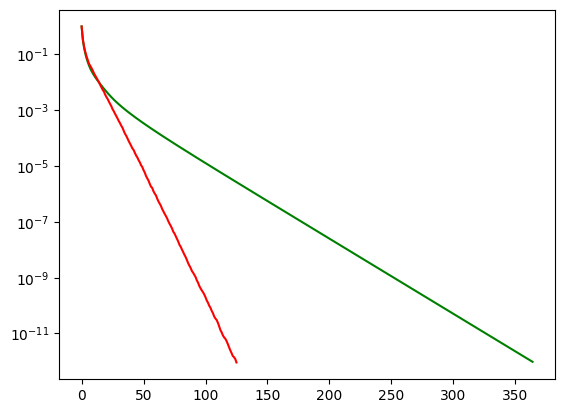

[A1] quadratica? True
[A1] simmetrica? True
[A1] def. positiva? True
[A1] sparsa? True
[A1] dimensione: (500, 500)
[A1] rango massimo? True
[A1] condizionamento: 14999.999999997213 

raggio spettrale Gauss-Seidel  0.9993658641407369
[A] it gauss-seidel: 2001
[A] it conigate gradient: 1057


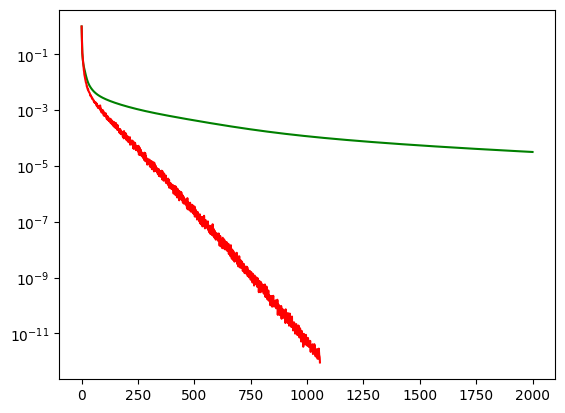

In [158]:
from scipy.io import loadmat
import matplotlib.pylab as plt
import numpy as np

# Caricamento dei dati dal file MATLAB
dati = loadmat("./mat/matrix-III.mat")
A = dati["A"].astype(float)
b = dati["b"].astype(float)

A1 = dati["A1"].astype(float)
b1 = dati["b1"].astype(float)

def isQuadratic(A):
    return A.shape[0] == A.shape[1]


def isSymmetric(A):
    return np.allclose(A, A.T)


def isPositive(A):
    return np.all(np.linalg.eigvals(A) > 0)


def isSparse(A):
    return np.count_nonzero(A) < A.size * 0.33


def rank(A, b):
    return np.linalg.matrix_rank(A) == np.linalg.matrix_rank(np.hstack([A, b]))


print("[A] quadratica?", isQuadratic(A))
print("[A] simmetrica?", isSymmetric(A))
print("[A] def. positiva?", isPositive(A))
print("[A] sparsa?", isSparse(A))
print("[A] dimensione:", A.shape)
print("[A] rango massimo?", rank(A, b))
print("[A] condizionamento:", np.linalg.cond(A), "\n")

max_it = 1000
x0 = np.zeros((b.size, 1))
x_gs, er_gs, it_gs = gauss_seidel(A, b, x0, max_it=max_it)
x_cg, er_cg, v, it_cg = conjugate_gradient(A, b, x0, max_it=max_it)

print("[A] it gauss-seidel:", it_gs)
print("[A] it conigate gradient:", it_cg)

plt.semilogy(np.arange(it_gs), er_gs, "g-", np.arange(it_cg + 1), er_cg, "r-")
plt.show()

print("[A1] quadratica?", isQuadratic(A1))
print("[A1] simmetrica?", isSymmetric(A1))
print("[A1] def. positiva?", isPositive(A1))
print("[A1] sparsa?", isSparse(A1))
print("[A1] dimensione:", A1.shape)
print("[A1] rango massimo?", rank(A1, b))
print("[A1] condizionamento:", np.linalg.cond(A1), "\n")

max_it = 2000
x0 = np.zeros((b1.size, 1))
x_gs, er_gs, it_gs = gauss_seidel(A1, b1, x0, max_it=max_it)
x_cg, er_cg, v, it_cg = conjugate_gradient(A1, b1, x0, max_it=max_it)

print("[A] it gauss-seidel:", it_gs)
print("[A] it conigate gradient:", it_cg)

plt.semilogy(np.arange(it_gs), er_gs, "g-", np.arange(it_cg + 1), er_cg, "r-")
plt.show()

# Il gradiente coniugato dimostra una superiorità significativa rispetto a Gauss-Seidel soprattutto quando la matrice è 
# mal condizionata e il raggio spettrale di Gauss-Seidel si avvicina a 1, condizioni che rallentano fortemente la convergenza di quest’ultimo.
# Questi risultati sono perfettamente coerenti con la teoria numerica e giustificano la preferenza per il CG in problemi reali con matrici SPD grandi e sparse.

# Avendo un raggio spettrale molto vicino a 1, il metodo Gauss-Seidel convergerà molto lentamente.
# Si potrebbe usare il metodo SOR, che è una generalizzazione di Gauss-Seidel, per accelerare la convergenza 
# tramite una scelta ottimale del parametro di rilassamento 


## Exercise 2

Si consideri la funzione $$f(x)=2\cdot x^4-(7/2) \cdot x^3+(3/4) \cdot x^2+x-1/4$$  
 - Si rappresenti il grafico della funzione in [-1,2] e si determini in quanti punti la funzione si annulla.  **[punti: 1]**
 -  Si implementi  il metodo di Newton per il calcolo degli zeri di una funzione non lineare. **[punti: 3]**
 - Si implementi il metodo di Bisezione per il calcolo degli zeri di una funzione non lineare. **[punti: 3]**
 - Osservando il grafico della funzione, si identifichi,  per ogni punto in cui si annulla, un opportuno intervallo che lo contenga. Si applichi il metodo di Bisezione per determinare lo zero della funzione in tale sottointervallo. Si dica se è possibile calcolare tutti gli zeri facendo uso del metodo di bisezione, richiamando il teorema su cui si basa il metodo di bisezione.  **[punti: 2]**
 - Osservando il grafico della funzione, si identifichi,  per ogni punto in cui si annulla, un opportuno iterato iniziale in un intorno dello zero e si utilizzi  il metodo di Newton per determinare lo zero della funzione. Si calcoli l'ordine del metodo usando la funzione stima_ordine. **[punti: 2]**
 -  Nel caso in cui si verifichi che il metodo di Newton abbia ordine 1, spiegare il perchè richiamando la teoria e modificare il metodo affinchè il suo ordine sia 2.  **[punti: 3]**

**Totale punti 14**

In [159]:
import numpy as np
import math


def sign(x):
    return math.copysign(1, x)


def metodo_bisezione(fname, a, b, tolX=1e-12):
    if sign(fname(a) * fname(b)) >= 0:
        print("Non è possibile applicare il metodo di bisezione")
        return None, None, None

    xk = []
    while abs(a - b) > tolX:
        c = a + (b - a) / 2
        xk.append(c)

        if fname(c) == 0:
            return c, xk, len(xk)
        elif sign(fname(a) * fname(c)) < 0:
            b = c
        else:
            a = c

    return c, xk, len(xk)


def newton(fname, fpname, x0, m=1, max_it=100, tolX=1e-12, tolF=1e-12):
    erroreX = 1 + tolX
    erroreF = 1 + tolF
    xk = []
    while len(xk) < max_it and erroreF >= tolF and erroreX >= tolX:
        if abs(fpname(x0)) <= np.spacing(1):
            print("derivata prima nulla in x0")
            return None, None, None

        d = fname(x0) / fpname(x0)
        x1 = x0 - m * d

        if x1 != 0:
            erroreX = abs(d / x1)
        else:
            erroreX = abs(d)

        erroreF = np.abs(fname(x1))
        xk.append(x1)
        x0 = x1

    if len(xk) == max_it:
        print("Newton: raggiunto massimo numero di iterazioni \n")

    return x1, xk, len(xk)


def stima_ordine(xk, iterazioni):
    k = iterazioni - 4
    return np.log(abs(xk[k + 2] - xk[k + 3]) / abs(xk[k + 1] - xk[k + 2])) / np.log(
        abs(xk[k + 1] - xk[k + 2]) / abs(xk[k] - xk[k + 1])
    )

soluzione 1 metodo bisezione -0.5
soluzione 2 metodo bisezione 0.25
soluzione 3 metodo bisezione 1.0

soluzione 1 metodo newton -0.5000000000000187
soluzione 2 metodo newton 0.25
soluzione 3 metodo newton 0.9999996641822603
Ordine zero 1: 2.0033087668972933
Ordine zero 2: 1.997703775262653
Ordine zero 3: 0.9995770513639567

soluzione 3 metodo newton 1.0000000000913873
Ordine zero 3: 1.9976598812187902



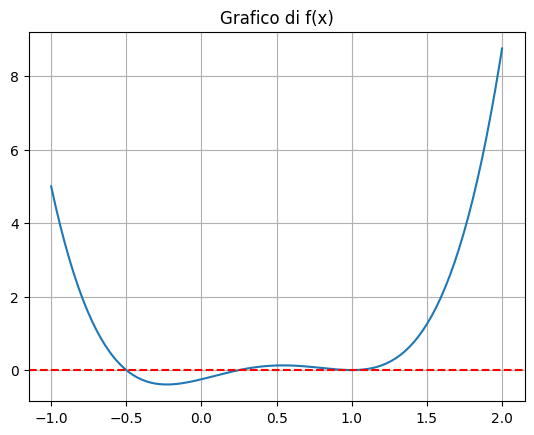

In [160]:
import matplotlib.pylab as plt
import numpy as np

f = lambda x: 2 * x**4 - (7 / 2) * x**3 + (3 / 4) * x**2 + x - (1 / 4)
fd = lambda x: 8 * x**3 - (21 / 2) * x**2 + (3 / 2) * x + 1
x = np.linspace(-1, 2, 200)

# Osservando il grafico, si notano 3 zeri approssimativamente in (-0.7, -0.4), (0.1, 0.5), (1.5, 2). 
#Per ciascuno, scegliamo un intervallo in cui la funzione cambia segno per applicare la bisezione.

s1_b, xk1_b, it1_b = metodo_bisezione(f, -1, -0)
s2_b, xk2_b, it2_b = metodo_bisezione(f, 0, 1)
s3_b, xk3_b, it3_b = metodo_bisezione(f, 0, 2)

print("soluzione 1 metodo bisezione", s1_b)
print("soluzione 2 metodo bisezione", s2_b)
print("soluzione 3 metodo bisezione", s3_b)

print("")

s1_n, xk1_n, it1_n = newton(f, fd, -0.7)
s2_n, xk2_n, it2_n = newton(f, fd, 0.3)
s3_n, xk3_n, it3_n = newton(f, fd, 0.7)

print("soluzione 1 metodo newton", s1_n)
print("soluzione 2 metodo newton", s2_n)
print("soluzione 3 metodo newton", s3_n)
print("Ordine zero 1:", stima_ordine(xk1_n, it1_n))
print("Ordine zero 2:", stima_ordine(xk2_n, it2_n))
print("Ordine zero 3:", stima_ordine(xk3_n, it3_n))

print("")

s3_n, xk3_n, it3_n = newton(f, fd, 0.7, m=2)
print("soluzione 3 metodo newton", s3_n)
print("Ordine zero 3:", stima_ordine(xk3_n, it3_n))

print("")

plt.plot(x, f(x))
plt.grid()
plt.axhline(0, color='red', linestyle='--')
plt.title("Grafico di f(x)")
plt.show()

# il metodo di bisezione funziona sempre se continua nell'intervallo a, b e se ha il cambio del segno nei sotto intervalli di studio 
# se newton converge con ordine 1 (lineare) anzichè 2 (quadratico), significa che lo zero è multiplo (f'(a) != 0) 
# con newton modificato se f'(a) == 0, usare m = moltplicità per ripristinare oridne 2

## Domande Intelligenza Artificiale
**NB: Ogni risposta esatta +0.5 punti, ogni risposta errata -0.5 punti. La mancanza di risposta 0 punti**

**1 Risolvere un problema mediante Machine Learning significa:**
 -  Fornire alla macchina i dati affinchè impari da sola a risolvere il problema
 - Fornire alla macchina solo dati etichettati affinchè impari da sola a risolvere il problema
 - Fornire alla macchina solo dati non etichettati affinchè impari da sola a risolvere il problema
 - Fornire alla macchina le esatte istruzioni per risolvere il problema


In [161]:
# Risposta: PUNTO [**1**]

**2  A cosa serve il validation set?**
 - A trovare i migliori iperparametri del modello
 - Ad addestrare il modello
 - A testare il modello
 - A trovare le etichette dei dati di input

In [162]:
# Risposta: PUNTO [**1**]

**3  Cosa è un Multi-Layer Perceptron?**
 -  Una rete multi-livello composta da neuroni completamente connessi
 -  Una rete muti-livello composta da livelli convolutivi e neuroni completamente connessi
 -  Una rete a singolo livello composta da neuroni completamente connessi
 - Un neurone artificiale con un determinato input e determinati valori di uscita

In [163]:
# Risposta: PUNTO [**1**]

**4 Il livello softmax**
 - Trasforma i digits della rete in probabilità
 - Trasforma le probabilità della rete in digits
 - Normalizza i valori di input della rete
 - È indispensabile nel task di regressione


In [164]:
# Risposta: PUNTO [**1**]

**5 In cosa consiste il task di regressione?**
 - Nel predire un valore continuo in output
 - Nel predire una classe in output
 - Nel predire un gruppo di appartenenza del dato di input
 - Nel predire una categoria in output

In [165]:
# Risposta: PUNTO [**1**]

## Domande Aperte

**6. Forward e backward Propagation per l'allenamento di una rete neurale** [punti 1.5]

In [166]:
# Forward-propagation
# È la fase in cui i dati di input passano attraverso la rete neurale, strato per strato, per calcolare l'output finale. 
# Ogni neurone riceve un input, lo moltiplica per i pesi, aggiunge un bias e applica una funzione di attivazione (es. ReLU, sigmoid).

# Backward-propagation
# È la fase in cui si correggono i pesi della rete usando l’errore tra output previsto y^ e reale y
# Si calcolano le derivate della funzione costo rispetto ai pesi usando la regola della catena (derivata composta), 
# propagando l’errore dall’output verso l’input.

**7. Metodo di ottimizzazione del gradient descent con momento**. Motivazioni e formula di aggiornamento dei pesi e commenti. [punti 3]

In [167]:
# problema del gradiente con momento: in presenza di valli strette nella superficie della funzione costo, l'algoritmo oscilla (zig-zag) e converge lentamente 
# Motivazioni del momento, è che sommando una parte della direzione del gradiente alla direzione attule, ci si ritrova per 
# accelerare lungo le direzioni corrette e rendere più "morbidi" le oscillazioni

# aggiornamento pesi: W(t + 1) = w(t) + v(t) -> i termini dentro le parentesi sono gli step, non dei parametri, quindi W(t) è il corrente e W(t + 1) il successivo
# il ruolo del termine del momento, controlla quanta parte della direzione precendete viene mantenuta